#Методические материалы 8 урок

## Как нейронные сети работают с изображениями


Самый наивный способ - это ничего не менять. Мы просто подаем каждый пиксель изображения на отдельный вход в нейронную сеть, она имеет несколько слоев нейронов, и в конце мы получаем ответ от нейронной сети.

В чем проблема такого подхода?  Только входных нейронов для изображения размером 64*64 нейронная сеть будет иметь 4096 входов, где каждый вход не несет существенной информации. Чтобы сделать более эффективно, были разработаны сверточные нейронные сети.

### Сверточные нейронные сети

Сверточная нейронная сеть - это особый тип нейронной сети, который используется для обработки изображений. Она устроена по-особенному, чтобы лучше понимать формы и паттерны на изображениях. Вот как она работает:

1. **Входной слой**: В самом начале у сверточной нейронной сети есть вход, где поступают изображения. Это могут быть фотографии кошек, собак или что-то еще.

2. **Слой свертки**: Этот слой - главная фишка CNN. Он содержит небольшие фильтры (как окна), которые скользят по изображению. Каждый фильтр ищет какие-то особенности, например, грани или углы.

3. **Результат свертки**: Когда фильтр находит интересное место на изображении, он создает карту признаков, которая показывает, где именно эта особенность находится.

4. **Слой субдискретизации (пулинг)**: После слоя свертки часто добавляют слой субдискретизации (пулинга). Этот слой уменьшает размер карты признаков, сохраняя при этом важные информации. Это помогает сделать сеть более эффективной.

5. **Полносвязные слои**: Затем идут обычные полносвязные слои, которые работают так же, как в других типах нейронных сетей. Они анализируют полученные признаки и делают окончательное решение о том, что изображено на фотографии.

6. **Выходной слой**: Выходной слой говорит, что находится на изображении. Например, он может сказать, что это кошка или собака.

Сверточная нейронная сеть обучается на большом количестве изображений, чтобы научиться лучше распознавать объекты. Она корректирует свои фильтры и веса, чтобы стать лучше в этом деле. Это, вкратце, как устроена сверточная нейронная сеть, которая помогает нам распознавать объекты на фотографиях.

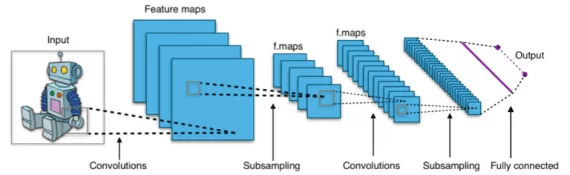

Операция свертки - это ключевой этап в обработке изображений в сверточных нейронных сетях. Она позволяет нейронной сети находить различные паттерны и особенности на изображении. Вот как это происходит:

* Изображение и фильтр: Для начала, мы имеем изображение. Это может быть фотография собаки, например. Также у нас есть специальный фильтр, который маленький и скользит (перемещается) по изображению. Фильтр - это матрица чисел, например, 3x3 или 5x5.

* Скользящее окно: Фильтр начинает скользить по изображению слева направо и сверху вниз. Он позиционируется поверх небольшой области изображения, и производит операцию умножения элементов этой области на соответствующие элементы фильтра, а затем суммирует все результаты.

* Создание карты признаков: Результат операции свертки для каждой позиции фильтра создает один элемент на новой карте признаков (feature map). Таким образом, карта признаков - это новое изображение, где каждый пиксель представляет собой результат операции свертки для соответствующей области исходного изображения.

* Проход по всему изображению: Фильтр продолжает скользить по всему исходному изображению, создавая новую карту признаков. При этом фильтр выполняет операцию свертки для каждой области изображения.

* Использование нескольких фильтров: Обычно в сверточных слоях используется несколько разных фильтров. Каждый фильтр может находить разные паттерны или особенности на изображении. Например, один фильтр может находить вертикальные грани, а другой - горизонтальные.

Таким образом, операция свертки позволяет сверточным нейронным сетям автоматически извлекать важные признаки из изображений, что делает их очень мощными инструментами для обработки и анализа визуальных данных, таких как фотографии.

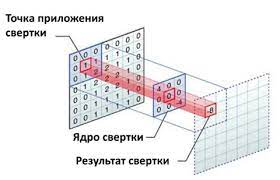

## Решение практической задачи распознования эмоций животных


Сразу импортируем необходимые позже билиотеки

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import os
import fastai
from fastai.vision import *

Скачаем наши данные

In [ ]:
!pip install kaggle

In [ ]:
api_token_kaggle = {"username":"zimike","key":"a45d5070c065c6727ea9503692e5ee5c"}

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = api_token_kaggle

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d anshtanwar/pets-facial-expression-dataset

pets-facial-expression-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/pets-facial-expression-dataset.zip -d /content/pets

Archive:  /content/pets-facial-expression-dataset.zip
replace /content/pets/Angry/02.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Давайте сопоставим списки путей к нашим картинкам и типы их картинок.

In [ ]:
import os

In [ ]:

data_dir = '/content/pets'


ds_name = 'Pets Facial Expression'

In [ ]:
# Generate data paths with labels

def generate_data_paths(data_dir):

    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        if fold == 'Master Folder':
            continue

        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold.lower())

    return filepaths, labels


filepaths,labels = generate_data_paths(data_dir)

Загрузим в ImageDataLoaders наши картинки. Для этого передадим туда папку, где хранятся наши картинки, список путей к каждой из картинок, названия для каждой картинки. Также используем item_tfms=Resize(460) на каждой картинке приведя их к единому размеру. Также при обучении на картинке будут применяться различные трансформации типа поворота, отзеркаливания и тому подобного, благодаря batch_tfms=aug_transforms(size=224). Параметр shuffle=True случайно перемешает наши картинки, а seed=12345672 нужен, чтобы при перемешивании получался один и тот же результат

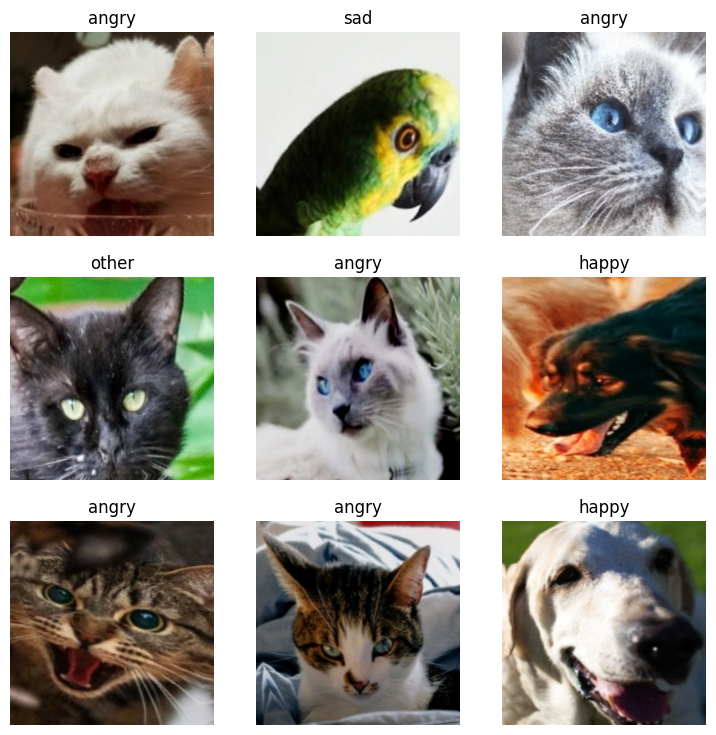

In [ ]:
dls = ImageDataLoaders.from_lists (data_dir, filepaths, labels, valid_pct=0.2,
                              seed=12345672, item_tfms=Resize(460),
                              batch_tfms=aug_transforms(size=224),
                              shuffle=True)
dls.show_batch()


Создадим учителя нашей нейронной сети и саму нейросеть, для этого будем использовать vision_learner. В него мы передадим наши данные, архитектуру нейронной сети (здесь мы используем resnet34, так как она быстро обучается и показывает хорошие результаты). Также мы передадим метрику оценивания нейронной сети. Ей будет error_rate, что математически равно отношению количества ошибок к количеству предсказаний

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Найдем оптимальный шаг обучения.

SuggestedLRs(valley=0.0005754399462603033)

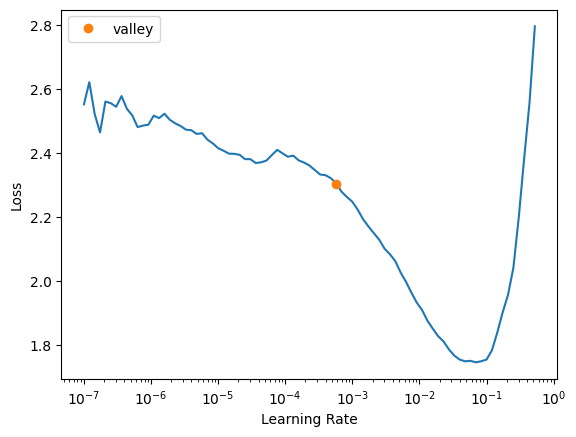

In [ ]:
learn.lr_find()

Обучим нашу сеть

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.116946,1.329493,0.425000,00:07


epoch,train_loss,valid_loss,error_rate,time
0,1.177889,0.754617,0.285000,00:06
1,0.930363,0.543509,0.185000,00:08
2,0.707950,0.363476,0.130000,00:07
3,0.534183,0.294998,0.090000,00:07
4,0.405103,0.249432,0.105000,00:07
5,0.312088,0.159020,0.060000,00:07
6,0.242272,0.128888,0.050000,00:07
7,0.189516,0.138315,0.060000,00:06
8,0.151099,0.141210,0.065000,00:07
9,0.122050,0.149905,0.060000,00:07


И посмотрим результаты

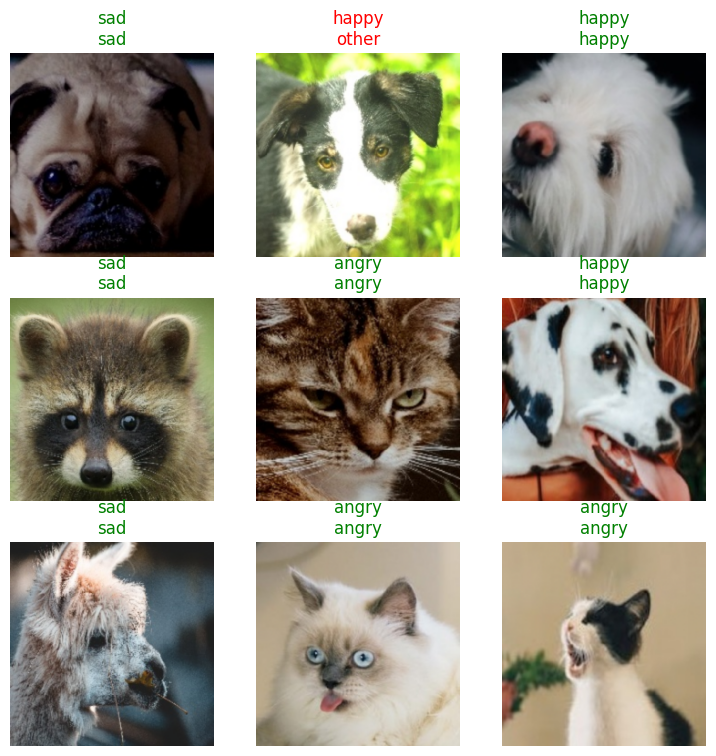

In [ ]:
learn.show_results()